In [5]:
import numpy as np
import os
import wfdb
from collections import Counter
import pickle
import random
import sys
from tqdm import tqdm

label_group_map = {'N':'N', 'L':'N', 'R':'N', 'e':'N', 'j':'N', 'A':'S', 'a':'S', 'J':'S', 'S':'S', 'V':'V', '!':'V','E':'V','[':'V',']':'V', 'f':'Q', '/':'Q', 'Q':'Q', 'F':'F'  }

def resample_unequal(ts, fs_in, fs_out):
    """
    interploration
    """
    fs_in, fs_out = int(fs_in), int(fs_out)
    if fs_out == fs_in:
        return ts
    else:
        x_old = np.linspace(0, 1, num=fs_in, endpoint=True)
        x_new = np.linspace(0, 1, num=fs_out, endpoint=True)
        y_old = ts
        f = interp1d(x_old, y_old, kind='linear')
        y_new = f(x_new)
        return y_new

if __name__ == "__main__":

    path = 'mit-bih-arrhythmia-database-1.0.0'
    save_path = 'data/'
#    valid_lead = ['MLII', 'II', 'I', 'MLI', 'V5']
    valid_lead = ['MLII'] 
    fs_out = 360

    all_data = []
    all_group = []

    with open(os.path.join(path, 'RECORDS'), 'r') as fin:
        all_record_name = fin.read().strip().split('\n')

    for record_name in all_record_name:
        try:
            tmp_ann_res = wfdb.rdann(path + '/' + record_name, 'atr').__dict__
            tmp_data_res = wfdb.rdsamp(path + '/' + record_name)
        except:
            print('read data failed')
            continue
        fs = tmp_data_res[1]['fs']

        ## total 1 second for each
        left_offset = int(1.0*fs / 2)
        right_offset = int(fs) - int(1.0*fs / 2)

        lead_in_data = tmp_data_res[1]['sig_name']
        my_lead_all = []
        for tmp_lead in valid_lead:
            if tmp_lead in lead_in_data:
                my_lead_all.append(tmp_lead)
        if len(my_lead_all) != 0:
            for my_lead in my_lead_all:
                channel = lead_in_data.index(my_lead)
                tmp_data = tmp_data_res[0][:, channel]

                idx_list = list(tmp_ann_res['sample'])
                label_list = tmp_ann_res['symbol']
                for i in range(len(label_list)):
                    s = label_list[i]
                    if s in label_group_map.keys():
                        idx_start = idx_list[i]-left_offset
                        idx_end = idx_list[i]+right_offset
                        if idx_start < 0 or idx_end > len(tmp_data):
                            continue
                        else:
                            all_data.append(resample_unequal(tmp_data[idx_start:idx_end], fs, fs_out))
                            all_group.append(label_group_map[s])
                    else:
                        continue
                print('record_name:{}, lead:{}, fs:{}'.format(record_name, my_lead, fs))
        else:
            print('lead in data: [{0}]. no valid lead in {1}'.format(lead_in_data, record_name))
            continue

    all_data = np.array(all_data)
    all_group = np.array(all_group)
    print(all_data.shape)
    print(Counter(all_group))
    np.save(os.path.join(save_path, 'mitdb_data.npy'), all_data)
    np.save(os.path.join(save_path, 'mitdb_group.npy'), all_group)


record_name:100, lead:MLII, fs:360
record_name:101, lead:MLII, fs:360
lead in data: [['V5', 'V2']]. no valid lead in 102
record_name:103, lead:MLII, fs:360
lead in data: [['V5', 'V2']]. no valid lead in 104
record_name:105, lead:MLII, fs:360
record_name:106, lead:MLII, fs:360
record_name:107, lead:MLII, fs:360
record_name:108, lead:MLII, fs:360
record_name:109, lead:MLII, fs:360
record_name:111, lead:MLII, fs:360
record_name:112, lead:MLII, fs:360
record_name:113, lead:MLII, fs:360
record_name:114, lead:MLII, fs:360
record_name:115, lead:MLII, fs:360
record_name:116, lead:MLII, fs:360
record_name:117, lead:MLII, fs:360
record_name:118, lead:MLII, fs:360
record_name:119, lead:MLII, fs:360
record_name:121, lead:MLII, fs:360
record_name:122, lead:MLII, fs:360
record_name:123, lead:MLII, fs:360
record_name:124, lead:MLII, fs:360
record_name:200, lead:MLII, fs:360
record_name:201, lead:MLII, fs:360
record_name:202, lead:MLII, fs:360
record_name:203, lead:MLII, fs:360
record_name:205, lead:M

2024-05-13 20:55:50.059615: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 20:55:50.059663: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 20:55:50.505179: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-13 20:55:51.073870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 20:56:19.806096: I tenso

Using TensorFlow backend
physical devices found: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
memory growth of dev0: None
memory growth of dev0: True (now enabled)
physical devices found: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
memory growth of dev0: True
Epoch 1/25
813/813 [==============================] - 71s 65ms/step - loss: 0.0361 - accuracy: 0.9153 - f1_score: 0.6044 - val_loss: 0.0130 - val_accuracy: 0.9664 - val_f1_score: 0.8231 - lr: 1.0000e-04
Epoch 2/25
813/813 [==============================] - 52s 64ms/step - loss: 0.0100 - accuracy: 0.9726 - f1_score: 0.8582 - val_loss: 0.0076 - val_accuracy: 0.9803 - val_f1_score: 0.8868 - lr: 1.0000e-04
Epoch 3/25
813/813 [==============================] - 52s 64ms/step - loss: 0.0068 - accuracy: 0.9804 - f1_score: 0.8917 - val_loss: 0.0058 - val_accuracy: 0.9830 - val_f1_score: 0.8930 - lr: 1.0000e-04
Epoch 4/25
813/813 [=======

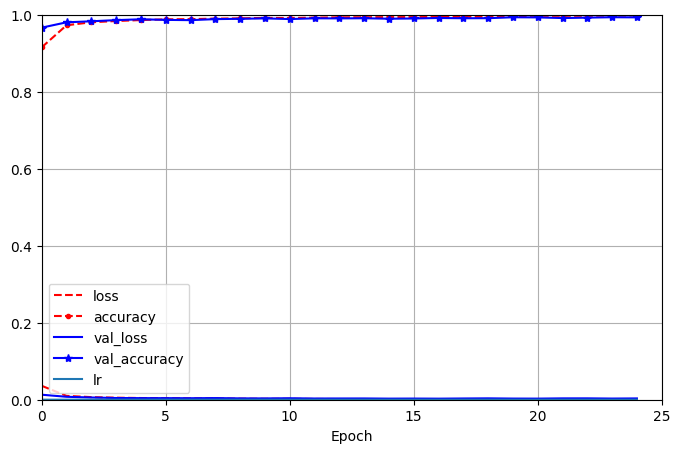

362/362 [==============================] - 5s 11ms/step
              precision    recall  f1-score   support

           N       1.00      1.00      1.00      9648
           S       0.96      0.89      0.92       252
           V       0.99      0.97      0.98       762
           F       0.84      0.84      0.84        77
           Q       1.00      1.00      1.00       820

    accuracy                           0.99     11559
   macro avg       0.96      0.94      0.95     11559
weighted avg       0.99      0.99      0.99     11559

Overall Accuracy: 99.32%
Overall F1 Score: 94.83%
Accuracy per class:
N: 99.84%
S: 89.29%
V: 97.11%
F: 84.42%
Q: 99.63%


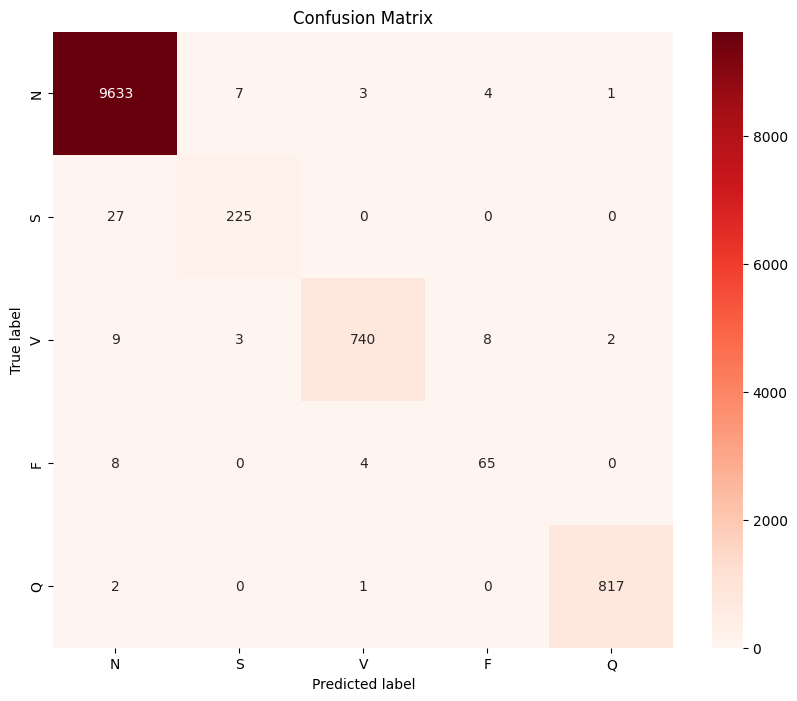

In [4]:
import tensorflow.keras as keras
from tensorflow.keras import utils
import os
import tensorflow as tf
import datetime
import numpy as np
from src import train_and_evaluate
from importlib import reload
reload(train_and_evaluate)
from src import crtnet_models
reload(crtnet_models)

def label2index(i):
    m = {'N':0, 'S':1, 'V':2, 'F':3, 'Q':4}
    return m[i]

def load_and_preprocess_data(path, num_classes):
    data = np.load(os.path.join(path, 'mitdb_data.npy'))
    label_str = np.load(os.path.join(path, 'mitdb_group.npy'))
    label = np.array([label2index(i) for i in label_str])
    one_hot = utils.to_categorical(label, num_classes=num_classes)
    return data, one_hot

path = 'data/'
num_classes = 5
class_names = ['N', 'S', 'V', 'F', 'Q']  # Update based on your classes

samples, one_hot_encoding_labels = load_and_preprocess_data(path, num_classes)

stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=0.00001)

create_crtnet_method = crtnet_models.create_crtnet_alternate_vgg1

train_and_evaluate.train_and_evaluate_model(
    create_crtnet_method,
    samples=samples,
    one_hot_encoding_labels=one_hot_encoding_labels,
    callbacks=[reduce_lr, stopping],
    is_multilabel=False,
    epochs=25,
    batch_size=128,
    classes=class_names,
    initial_learning_rate=0.0001,
    number_of_leads=1
)

